简单线性回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#导入自己实现的简单线性回归，使用最小二乘法实现，一个使用for循环一个使用向量点乘
from MyLinearRegression1 import SimpleLinearRegression1
from MyLinearRegression2 import SimpleLinearRegression2

In [3]:
x = np.array([1.,2.,3.,4.,5.])
y = np.array([1.,3.,2.,3.,5.])

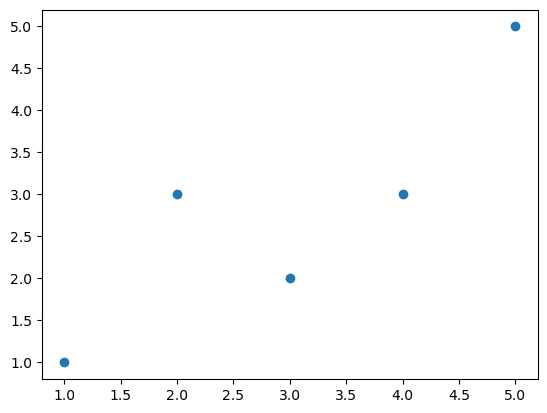

In [4]:
plt.scatter(x,y)
plt.show()

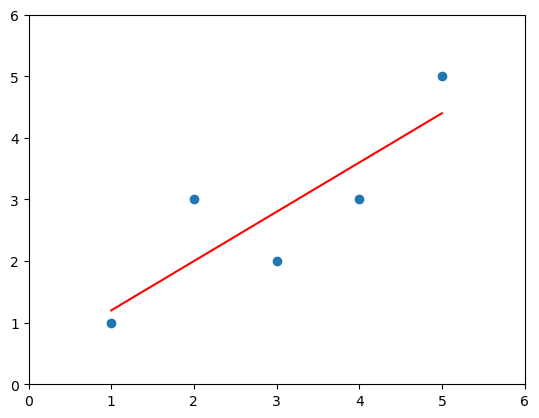

In [5]:
simpleLinearRegression1 = SimpleLinearRegression1()
simpleLinearRegression1.fit(x,y)
y_hat = simpleLinearRegression1.a_ * x + simpleLinearRegression1.b_
plt.scatter(x,y)
plt.plot(x,y_hat,color = 'r')
plt.axis([0,6,0,6])
plt.show()

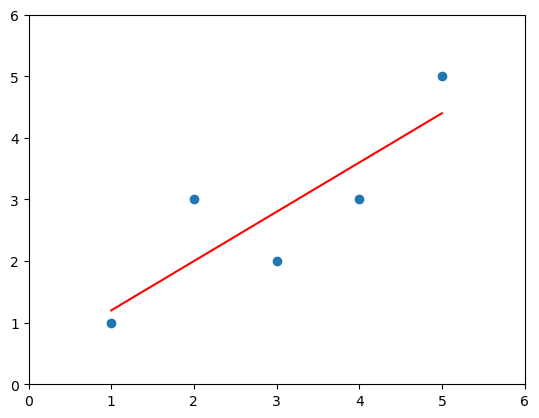

In [6]:
simpleLinearRegression2 = SimpleLinearRegression2()
simpleLinearRegression2.fit(x,y)
y_hat_2 = simpleLinearRegression2.a_ * x + simpleLinearRegression2.b_
plt.scatter(x,y)
plt.plot(x,y_hat_2,color = 'r')
plt.axis([0,6,0,6])
plt.show()

In [7]:
from sklearn import datasets
import pandas as pd

In [8]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
x = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]
x = x[y < 50]
y = y[y < 50]

In [9]:
from model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,0.2,666)

In [10]:
from MyLinearRegression3 import SimpleLinearRegression3
simpleLinearRegression3 = SimpleLinearRegression3()
simpleLinearRegression3.fit_normal(x,y)
simpleLinearRegression3.coef_

array([-1.06715912e-01,  3.53133180e-02, -4.38830943e-02,  4.52209315e-01,
       -1.23981083e+01,  3.75945346e+00, -2.36790549e-02, -1.21096549e+00,
        2.51301879e-01, -1.37774382e-02, -8.38180086e-01,  7.85316354e-03,
       -3.50107918e-01])

In [11]:
simpleLinearRegression3.interception_

32.229841669908694

In [12]:
simpleLinearRegression3.score(x_test,y_test)

0.8208921706453166

使用sklearn中的线性回归

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 666)

In [14]:
np.random.seed(666)
x = 2 * np.random.random(100)
y = x * 3. + 4 + np.random.random(100)


批量梯度下降

In [15]:
from MyLinearRegression4 import SimpleLinearRegression4
simpleLinearRegression4 = SimpleLinearRegression4()
simpleLinearRegression4.fit_gd(x,y)

SimpleLinearRegression4()

In [16]:
simpleLinearRegression4.coef_

array([2.96828885])

In [17]:
simpleLinearRegression4.interception_

4.545032988179632

随机梯度和批量梯度耗时对比

In [18]:

m = 10000
x = np.random.normal(size = m)
y = 4.*x + 3. + np.random.normal(0,3,size = m)
x = x.reshape(-1,1)
x,y

(array([[ 0.61355883],
        [-0.18229069],
        [ 0.31415839],
        ...,
        [-1.62562334],
        [-1.46743002],
        [-0.91987784]]),
 array([ 5.62202393,  5.23363377,  2.09935174, ..., -3.01904287,
         0.58476959, -3.46211577]))

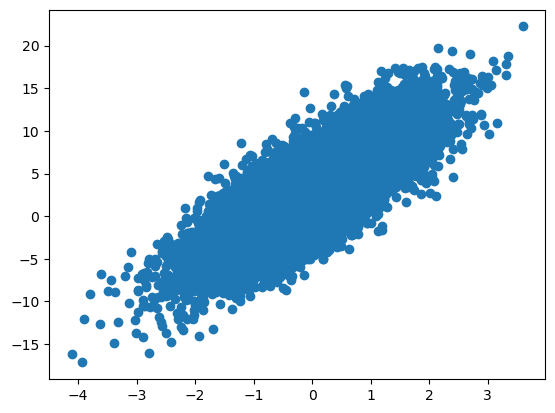

In [19]:
plt.scatter(x,y)
plt.show()

In [20]:
%%time
simpleLinearRegression4 = SimpleLinearRegression4()
simpleLinearRegression4.fit_gd(x,y,3000)

C:\Users\zhulin\Downloads\ml-main\MyLinearRegression4.py:12: RuntimeWarning: overflow encountered in square
  return np.sum((y - x_b.dot(theta)) ** 2) / len(y)
C:\Users\zhulin\Downloads\ml-main\MyLinearRegression4.py:55: RuntimeWarning: invalid value encountered in scalar subtract
  if abs(self.J(theta, x_b, y) - self.J(last_theta, x_b, y)) < epsilon:


CPU times: total: 19.5 s
Wall time: 2.43 s


SimpleLinearRegression4()

In [21]:
%%time
simpleLinearRegression4 = SimpleLinearRegression4()
simpleLinearRegression4.fit_sgd(x,y,3000)

CPU times: total: 625 ms
Wall time: 75 ms


SimpleLinearRegression4()

改进随机的过程

In [22]:
from MyLinearRegression5 import SimpleLinearRegression5
simpleLinearRegression5 = SimpleLinearRegression5()
simpleLinearRegression5.fit_sgd(x,y,5)
simpleLinearRegression5.coef_

array([4.04114085])

In [23]:
simpleLinearRegression5.interception_

2.9790717633320565